In [1]:
pip install evidently==0.2.8 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [1]:
pip install evidently 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import evidently
from evidently.report import Report
from evidently.metrics import ColumnDriftMetric

In [2]:
# Charger les datasets
train_data = pd.read_csv('C:/Users/paulm/Documents/Projet 7/Projet7withCSV/data/application_train.csv')
test_data = pd.read_csv('C:/Users/paulm/Documents/Projet 7/Projet7withCSV/data/application_test.csv')

# Afficher les premières lignes des datasets pour vérification
print("Train Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())                                      

Train Data:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0 

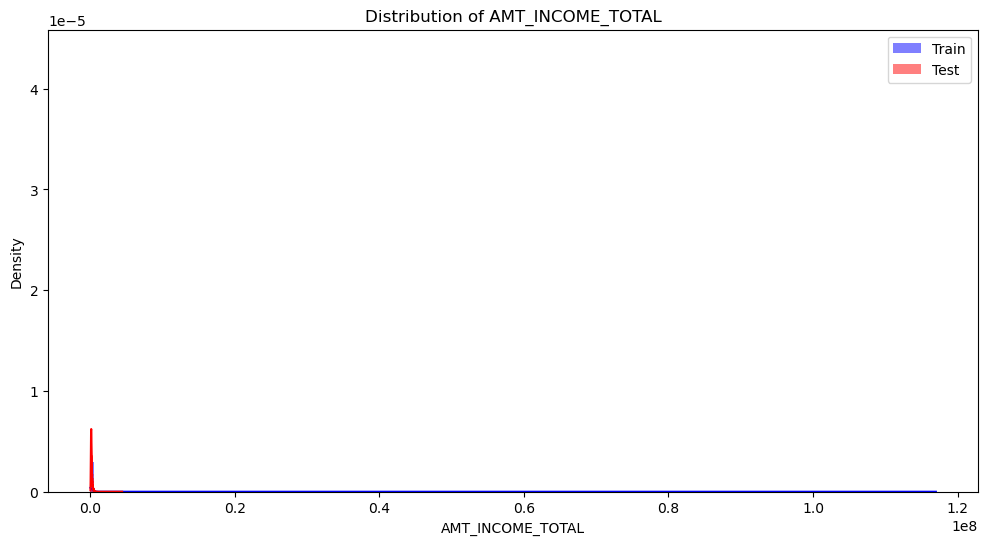

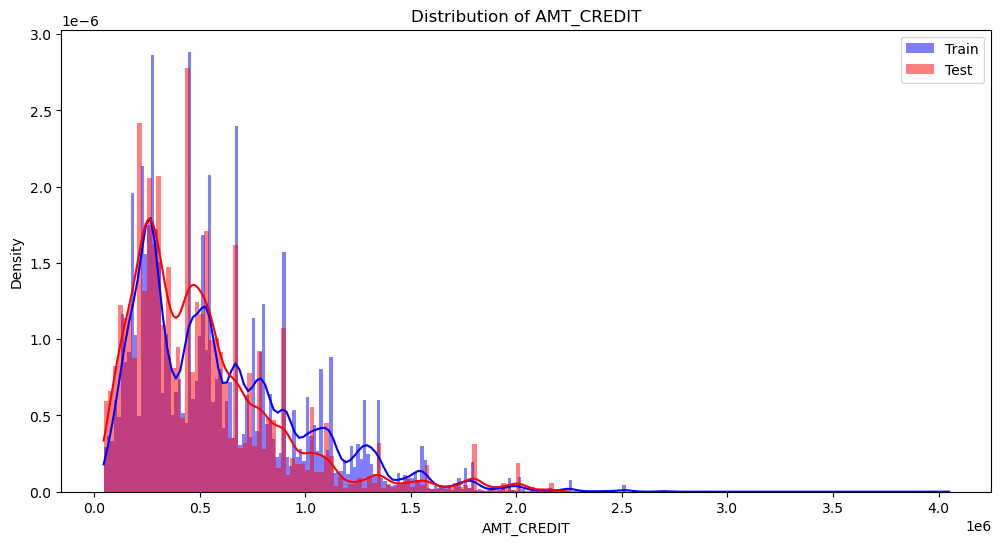

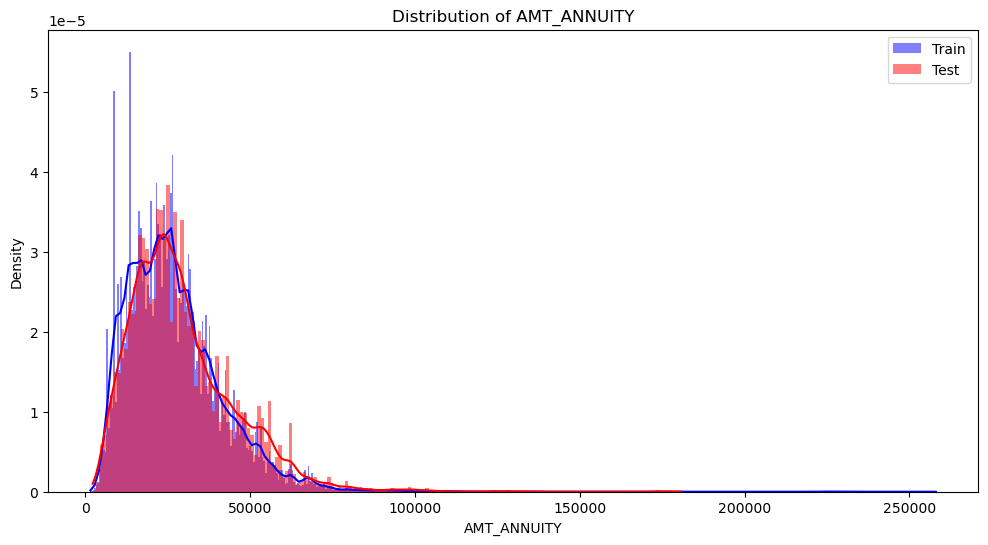

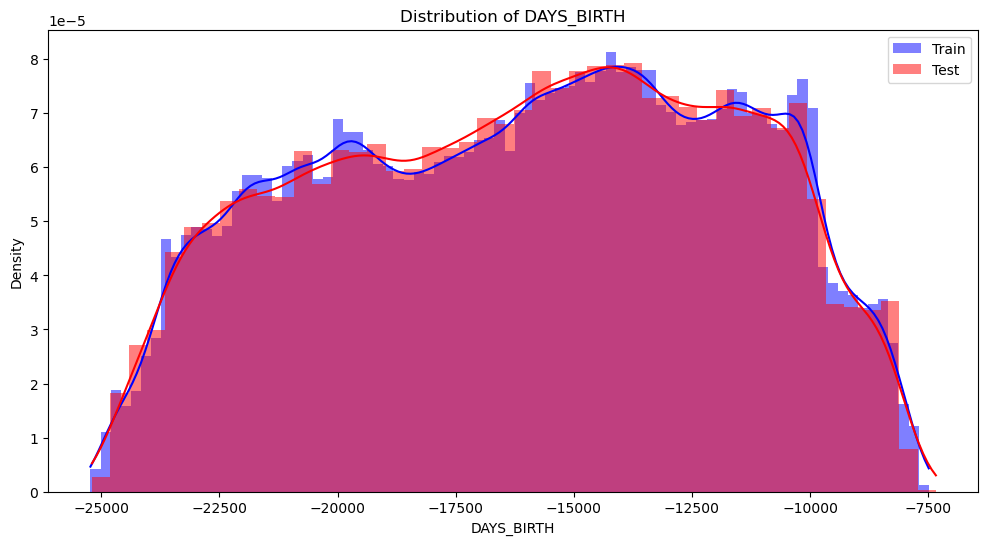

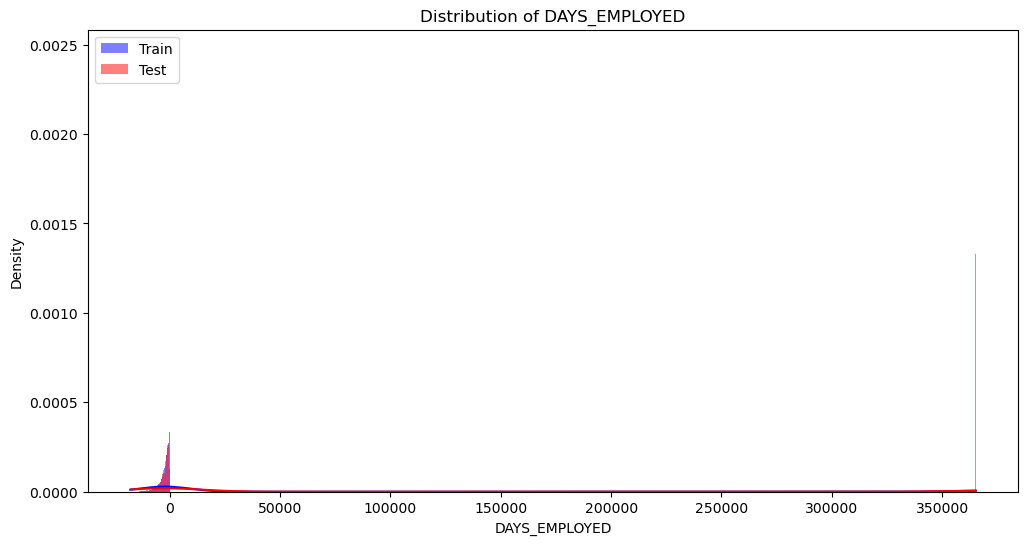

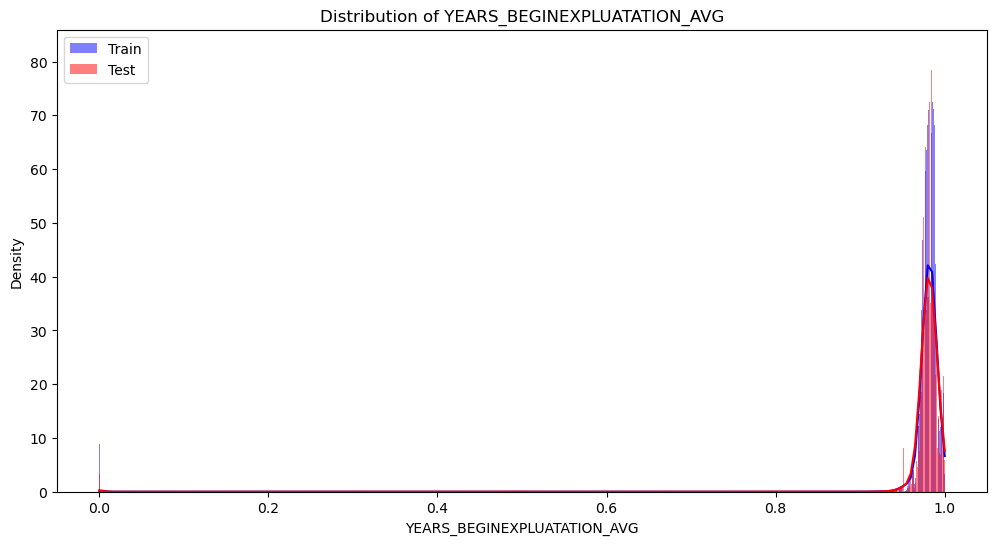

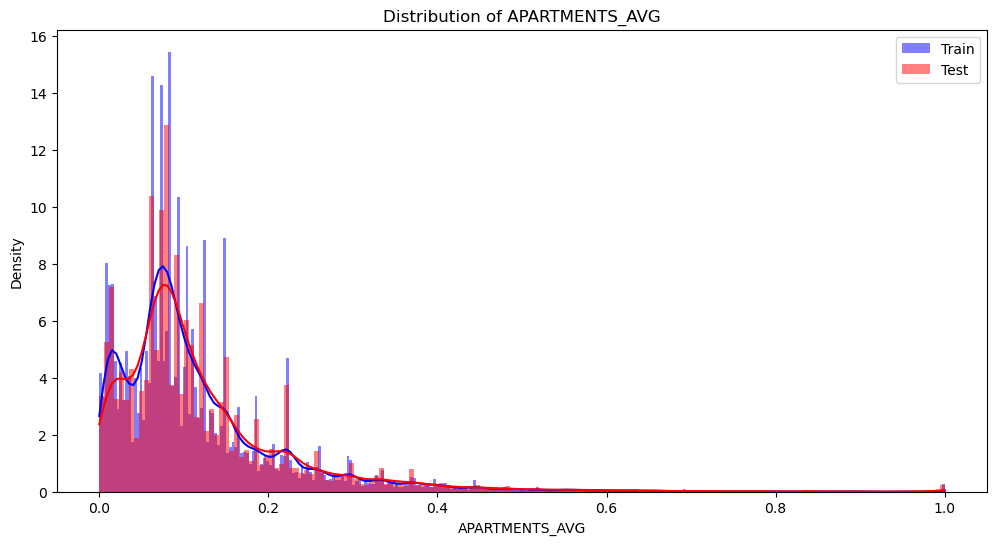

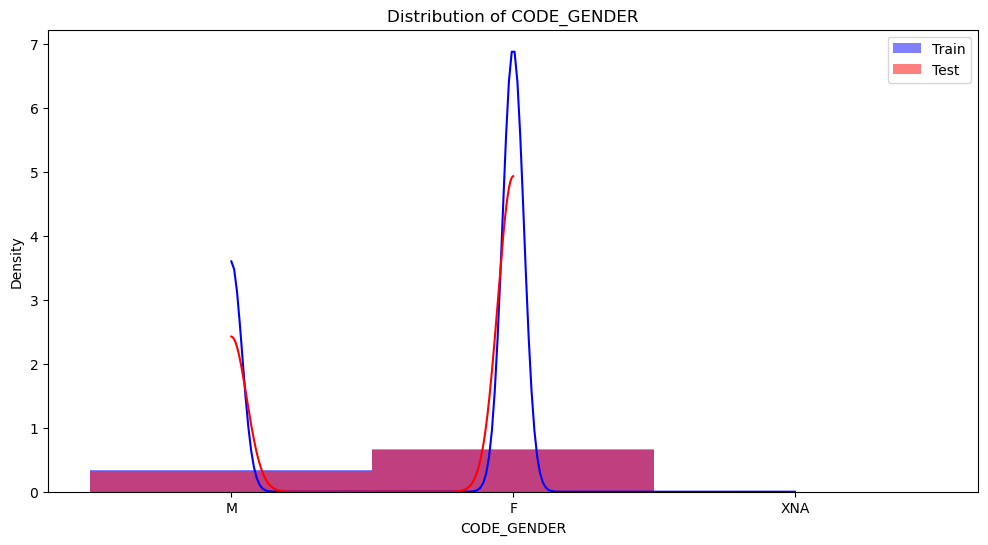

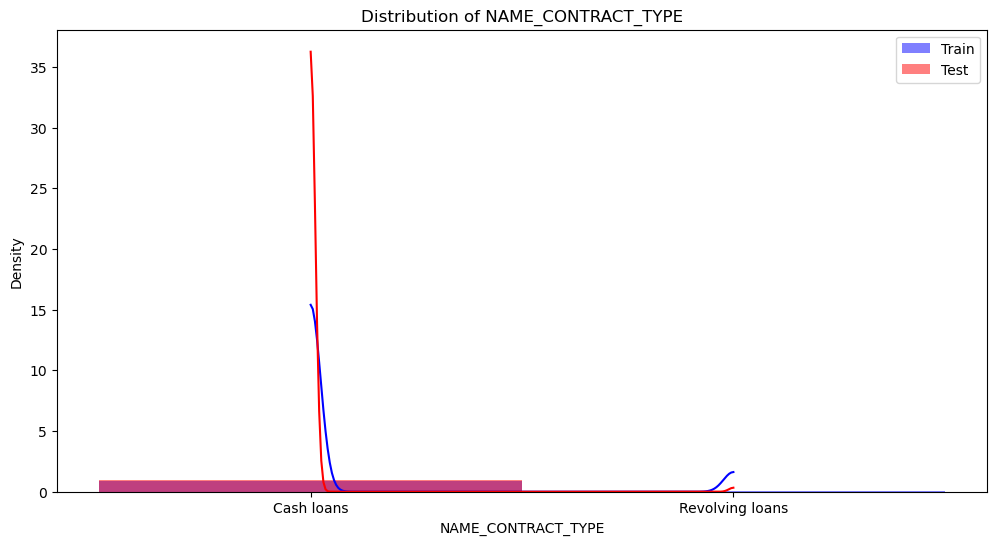

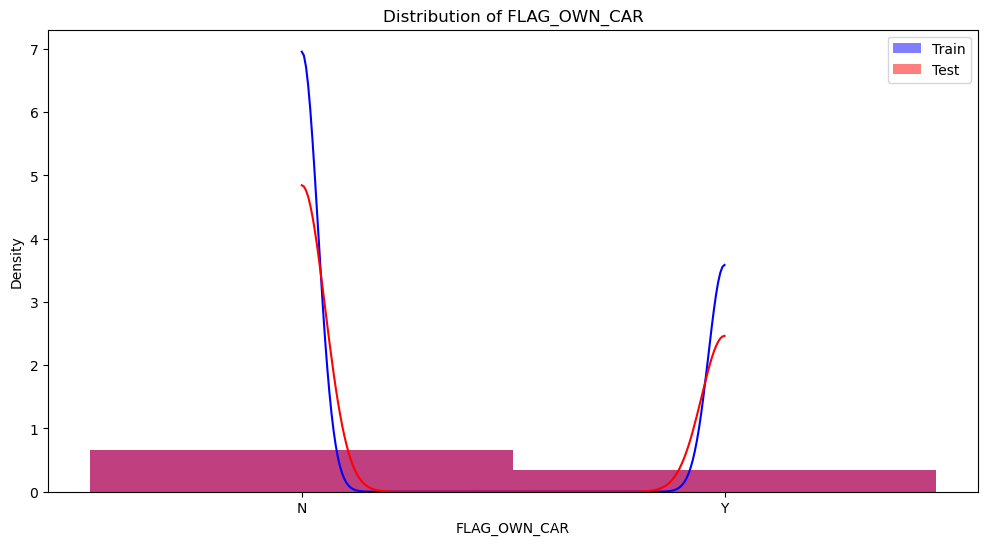

In [10]:
# Fonction pour tracer la distribution des features
def plot_feature_distribution(train_df, test_df, feature):
    plt.figure(figsize=(12, 6))
    sns.histplot(train_df[feature], kde=True, color='blue', label='Train', stat='density', linewidth=0)
    sns.histplot(test_df[feature], kde=True, color='red', label='Test', stat='density', linewidth=0)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Liste des features à comparer (exemple)
features_to_compare = [
    'AMT_INCOME_TOTAL', 
    'AMT_CREDIT', 
    'AMT_ANNUITY', 
    'DAYS_BIRTH', 
    'DAYS_EMPLOYED', 
    'YEARS_BEGINEXPLUATATION_AVG',
    'APARTMENTS_AVG',
    'CODE_GENDER',
    'NAME_CONTRACT_TYPE',
    'FLAG_OWN_CAR'
]

for feature in features_to_compare:
    plot_feature_distribution(train_data, test_data, feature)

In [11]:
from scipy.stats import ks_2samp

# Fonction pour tester la similarité des distributions entre train et test
def test_feature_distribution(train_df, test_df, feature):
    stat, p_value = ks_2samp(train_df[feature], test_df[feature])
    return stat, p_value

# Tester chaque feature
for feature in features_to_compare:
    stat, p_value = test_feature_distribution(train_data, test_data, feature)
    print(f'Feature: {feature}, KS Statistic: {stat:.4f}, p-value: {p_value:.4f}')


Feature: AMT_INCOME_TOTAL, KS Statistic: 0.0568, p-value: 0.0000
Feature: AMT_CREDIT, KS Statistic: 0.1162, p-value: 0.0000
Feature: AMT_ANNUITY, KS Statistic: nan, p-value: nan
Feature: DAYS_BIRTH, KS Statistic: 0.0078, p-value: 0.0124
Feature: DAYS_EMPLOYED, KS Statistic: 0.0208, p-value: 0.0000
Feature: YEARS_BEGINEXPLUATATION_AVG, KS Statistic: nan, p-value: nan
Feature: APARTMENTS_AVG, KS Statistic: nan, p-value: nan
Feature: CODE_GENDER, KS Statistic: 0.0121, p-value: 0.0000
Feature: NAME_CONTRACT_TYPE, KS Statistic: 0.0862, p-value: 0.0000
Feature: FLAG_OWN_CAR, KS Statistic: 0.0030, p-value: 0.8480


In [13]:
# Vérifier les valeurs manquantes dans les colonnes avec NaN pour train_data
for feature in ['AMT_ANNUITY', 'YEARS_BEGINEXPLUATATION_AVG', 'APARTMENTS_AVG']:
    print(f"{feature} - Train Data NaNs: {train_data[feature].isna().sum()}")
    print(f"{feature} - Test Data NaNs: {test_data[feature].isna().sum()}")

# Vérifier si les colonnes sont constantes
for feature in ['AMT_ANNUITY', 'YEARS_BEGINEXPLUATATION_AVG', 'APARTMENTS_AVG']:
    print(f"{feature} - Train Data Unique Values: {train_data[feature].nunique()}")
    print(f"{feature} - Test Data Unique Values: {test_data[feature].nunique()}")

AMT_ANNUITY - Train Data NaNs: 12
AMT_ANNUITY - Test Data NaNs: 24
YEARS_BEGINEXPLUATATION_AVG - Train Data NaNs: 150007
YEARS_BEGINEXPLUATATION_AVG - Test Data NaNs: 22856
APARTMENTS_AVG - Train Data NaNs: 156061
APARTMENTS_AVG - Test Data NaNs: 23887
AMT_ANNUITY - Train Data Unique Values: 13672
AMT_ANNUITY - Test Data Unique Values: 7491
YEARS_BEGINEXPLUATATION_AVG - Train Data Unique Values: 285
YEARS_BEGINEXPLUATATION_AVG - Test Data Unique Values: 175
APARTMENTS_AVG - Train Data Unique Values: 2339
APARTMENTS_AVG - Test Data Unique Values: 1543


In [5]:
pip install evidently --upgrade

  Using cached evidently-0.4.34-py3-none-any.whl.metadata (11 kB)
Using cached evidently-0.4.34-py3-none-any.whl (3.4 MB)
  Attempting uninstall: evidently
    Found existing installation: evidently 0.4.19
    Uninstalling evidently-0.4.19:
      Successfully uninstalled evidently-0.4.19
Note: you may need to restart the kernel to use updated packages.


In [20]:
from evidently.tabs import DataDriftTab

In [31]:
from evidently.report import Report
from evidently.tabs import DataDriftTab

In [8]:
# Supprimer la colonne "target" du dataset d'entraînement (si nécessaire)
if "TARGET" in train_data.columns:
    train_data = train_data.drop("TARGET", axis=1)

In [9]:
print(train_data.columns)

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)


In [10]:
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset

# Créer un rapport de dérive des données en utilisant DataDriftPreset
drift_report = Report(metrics=[DataDriftPreset()])

# Exécuter le rapport avec les ensembles de données d'entraînement et de test
drift_report.run(reference_data=train_data, current_data=test_data)

# Sauvegarder le rapport en HTML
drift_report.save_html('data_drift_report.html')

In [30]:
print("Colonnes dans train_data :", train_data.columns)
print("Colonnes dans test_data :", test_data.columns)

Colonnes dans train_data : Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)
Colonnes dans test_data : Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON',

### Enregistrement des scores dans un CSV

In [1]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


Création des prédictions sur dataset test :

In [21]:
import joblib

# Charger le modèle
model = joblib.load('C:/Users/paulm/Documents/Projet 7/Projet7withCSV/model/xgboost_model.pkl')

# Charger les données de test
test_data = pd.read_csv('C:/Users/paulm/Documents/Projet 7/Projet7withCSV/data/X_test_predictionV2.csv')

# Enlever la colonne 'SK_ID_CURR' avant de faire la prédiction
test_data_for_prediction = test_data.drop(columns=['SK_ID_CURR'])

# Faire des prédictions
predictions_proba = model.predict_proba(test_data_for_prediction)[:, 1]  # Probabilités pour la classe positive

# Ajouter les scores au dataframe de test
test_data['prediction_proba'] = predictions_proba

# Sauvegarder les prédictions et les scores dans un fichier CSV
test_data[['SK_ID_CURR', 'prediction_proba']].to_csv('test_scores.csv', index=False)

Création des prédiction sur le dataset train :

In [10]:
# Charger les données d'entraînement
train_data = pd.read_csv('C:/Users/paulm/Documents/Projet 7/Projet7withCSV/data/X_predictionV1.csv')

# Conserver la colonne SK_ID_CURR pour le fichier de sortie
sk_id_curr = train_data['SK_ID_CURR']

# Enlever la colonne TARGET et SK_ID_CURR avant de faire la prédiction
train_data_for_prediction = train_data.drop(columns=['TARGET', 'SK_ID_CURR'])

# Charger le modèle
model = joblib.load('C:/Users/paulm/Documents/Projet 7/Projet7withCSV/model/xgboost_model.pkl')

# Faire des prédictions
predictions_proba_train = model.predict_proba(train_data_for_prediction)[:, 1]  # Probabilités pour la classe positive

# Ajouter les scores au dataframe d'entraînement
train_data['prediction_proba'] = predictions_proba_train

# Sauvegarder les prédictions et les scores dans un fichier CSV
train_data[['SK_ID_CURR', 'prediction_proba']].to_csv('train_scores.csv', index=False)


Visualisation grapohique des résultats : 

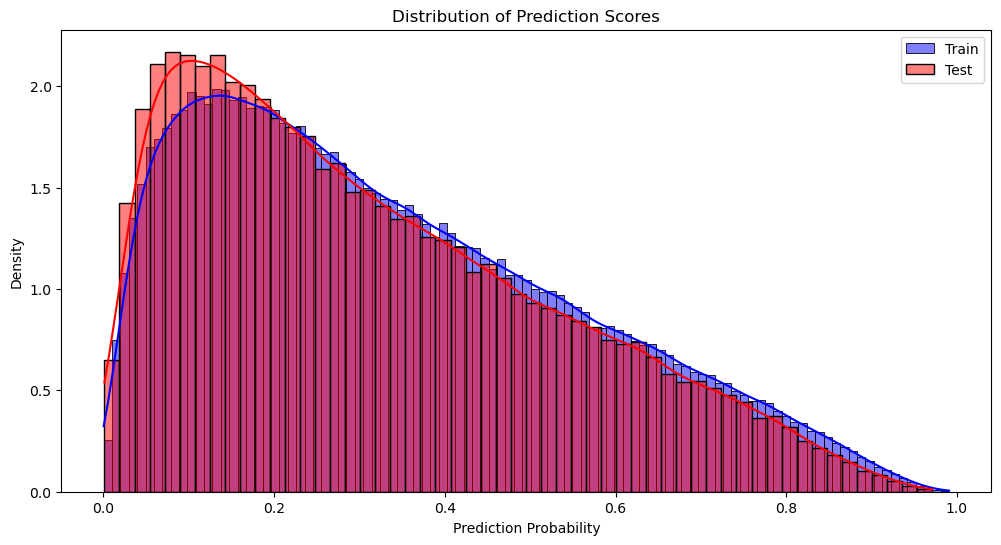

In [22]:
# Charger les scores d'entraînement et de test
train_scores = pd.read_csv('train_scores.csv')
test_scores = pd.read_csv('test_scores.csv')

# Tracer les distributions des scores
plt.figure(figsize=(12, 6))
sns.histplot(train_scores['prediction_proba'], kde=True, color='blue', label='Train', stat='density')
sns.histplot(test_scores['prediction_proba'], kde=True, color='red', label='Test', stat='density')
plt.title('Distribution of Prediction Scores')
plt.xlabel('Prediction Probability')
plt.ylabel('Density')
plt.legend()
plt.show()

### Interprétation des Distributions:

Ensemble d'entraînement (Train) : La distribution des scores de l'ensemble d'entraînement montre toujours une gamme variée de prédictions, ce qui est bon signe. Cela indique que le modèle continue de différencier correctement les classes.

Ensemble de test (Test) : Les distributions des scores d'entraînement et de test sont désormais relativement proches, ce qui montre une meilleure capacité de généralisation du modèle. Cependant, on observe une légère tendance à avoir plus de prédictions basses en termes de densité dans l'ensemble de test, avec globalement moins de probabilités élevées. Cela pourrait indiquer que le modèle reste plus conservateur dans ses prédictions sur le jeu de test, mais il est rassurant que l'écart entre les ensembles soit désormais plus réduit.

In [23]:
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset

# Créer et exécuter le rapport
drift_report = Report(metrics=[DataDriftPreset()])
drift_report.run(reference_data=train_scores, current_data=test_scores)

# Sauvegarder le rapport en HTML
drift_report.save_html('data_drift_report_target.html')

Drift dans le temps : 

In [23]:
test_df = pd.read_csv('C:/Users/paulm/Documents/Projet 7/Projet7withCSV/data/X_predictionV1.csv')

In [25]:
col_test = test_df['DAYS_REGISTRATION']
print(col_test)

0         12039.0
1         14501.0
2         11427.0
3          5854.0
4         11376.0
           ...   
307487     7231.0
307488    11299.0
307489     8950.0
307490    13125.0
307491    10559.0
Name: DAYS_REGISTRATION, Length: 307492, dtype: float64


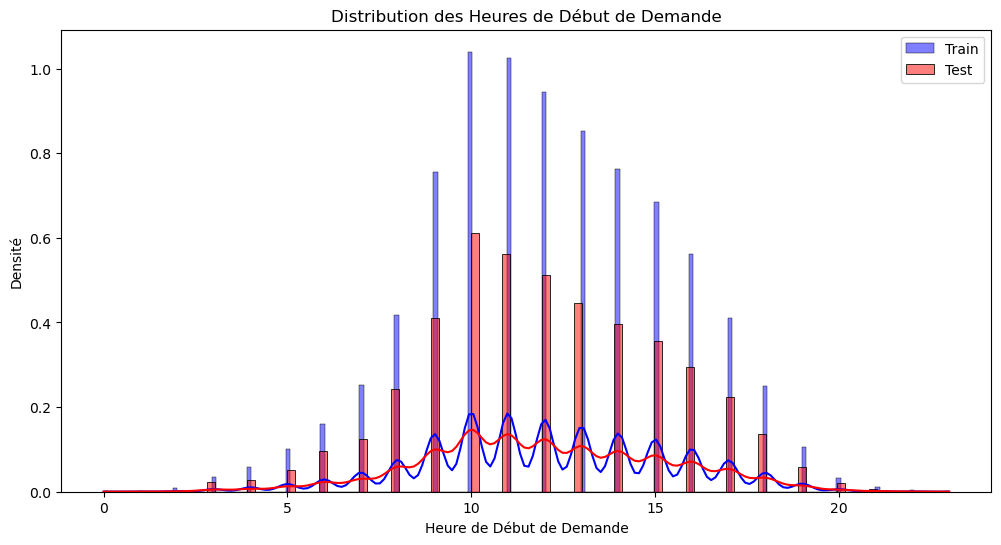

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la distribution des heures
plt.figure(figsize=(12, 6))
sns.histplot(train_data['HOUR_APPR_PROCESS_START'], kde=True, color='blue', label='Train', stat='density')
sns.histplot(test_data['HOUR_APPR_PROCESS_START'], kde=True, color='red', label='Test', stat='density')
plt.title('Distribution des Heures de Début de Demande')
plt.xlabel('Heure de Début de Demande')
plt.ylabel('Densité')
plt.legend()
plt.show()

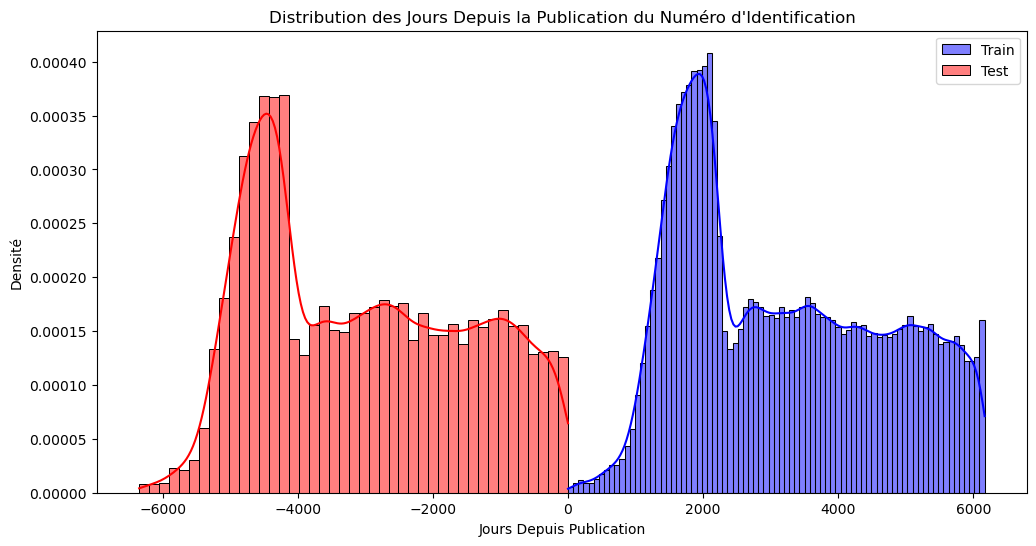

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la distribution des jours depuis la publication du numéro d'identification
plt.figure(figsize=(12, 6))
sns.histplot(train_data['DAYS_ID_PUBLISH'], kde=True, color='blue', label='Train', stat='density')
sns.histplot(test_data['DAYS_ID_PUBLISH'], kde=True, color='red', label='Test', stat='density')
plt.title('Distribution des Jours Depuis la Publication du Numéro d\'Identification')
plt.xlabel('Jours Depuis Publication')
plt.ylabel('Densité')
plt.legend()
plt.show()


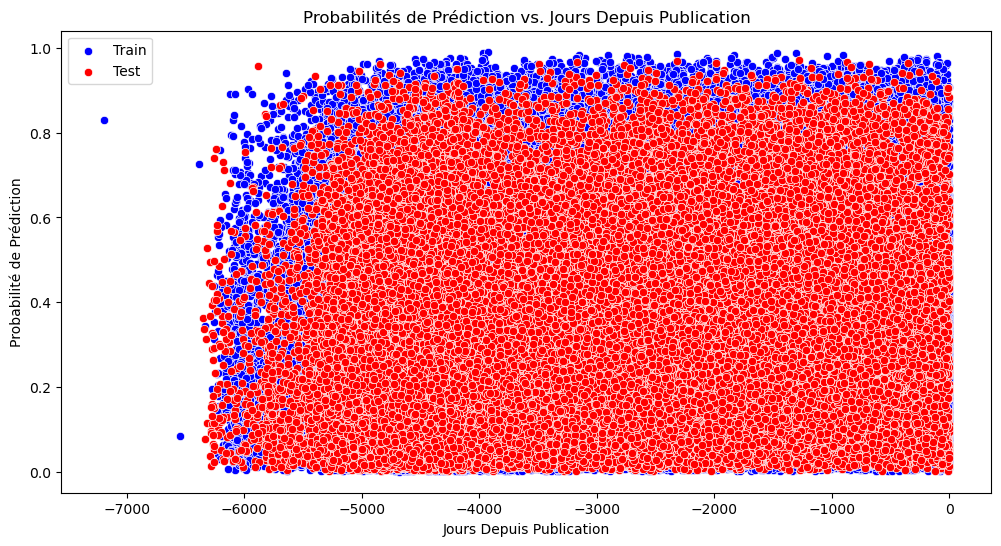

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=train_data['DAYS_ID_PUBLISH'], y='prediction_proba', data=train_scores, color='blue', label='Train')
sns.scatterplot(x=test_data['DAYS_ID_PUBLISH'], y='prediction_proba', data=test_scores, color='red', label='Test')
plt.title('Probabilités de Prédiction vs. Jours Depuis Publication')
plt.xlabel('Jours Depuis Publication')
plt.ylabel('Probabilité de Prédiction')
plt.legend()
plt.show()

Analyse du  drift temporel : 

In [28]:
# Associer les scores aux données temporelles
train_scores['DAYS_ID_PUBLISH'] = train_data['DAYS_ID_PUBLISH']
test_scores['DAYS_ID_PUBLISH'] = test_data['DAYS_ID_PUBLISH']

In [29]:
# Convertir DAYS_ID_PUBLISH en dates
train_scores['REGISTRATION_DATE'] = pd.to_datetime(0 - train_scores['DAYS_ID_PUBLISH'], unit='D', origin='2000-01-01')
test_scores['REGISTRATION_DATE'] = pd.to_datetime(0 - test_scores['DAYS_ID_PUBLISH'], unit='D', origin='2000-01-01')

# Extraire le mois et l'année pour analyse temporelle
train_scores['Month_Year'] = train_scores['REGISTRATION_DATE'].dt.to_period('M')
test_scores['Month_Year'] = test_scores['REGISTRATION_DATE'].dt.to_period('M')

In [30]:
# Agréger les données par mois et année
train_monthly = train_scores.groupby('Month_Year').agg({'prediction_proba': 'mean'})
test_monthly = test_scores.groupby('Month_Year').agg({'prediction_proba': 'mean'})

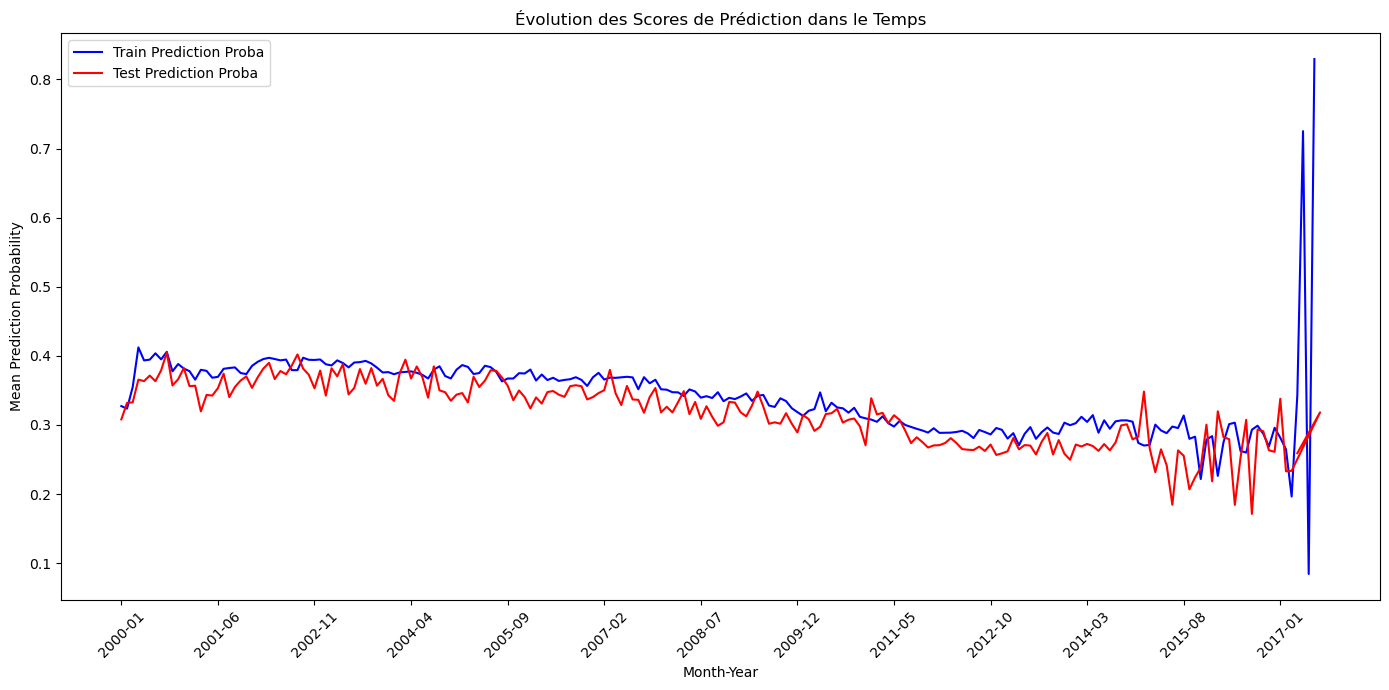

In [31]:
# Tracer la moyenne des scores de prédiction dans le temps avec moins de mois affichés
plt.figure(figsize=(14, 7))
plt.plot(train_monthly.index.astype(str), train_monthly['prediction_proba'], label='Train Prediction Proba', color='blue')
plt.plot(test_monthly.index.astype(str), test_monthly['prediction_proba'], label='Test Prediction Proba', color='red')

# Ajuster l'affichage des labels de l'axe des x pour ne pas afficher tous les mois
plt.xticks(ticks=range(0, len(train_monthly.index), max(1, len(train_monthly.index) // 12)),
           labels=train_monthly.index.astype(str)[::max(1, len(train_monthly.index) // 12)], rotation=45)

plt.xlabel('Month-Year')
plt.ylabel('Mean Prediction Probability')
plt.title('Évolution des Scores de Prédiction dans le Temps')
plt.legend()
plt.tight_layout()  # Ajuster les marges pour éviter le recouvrement
plt.show()

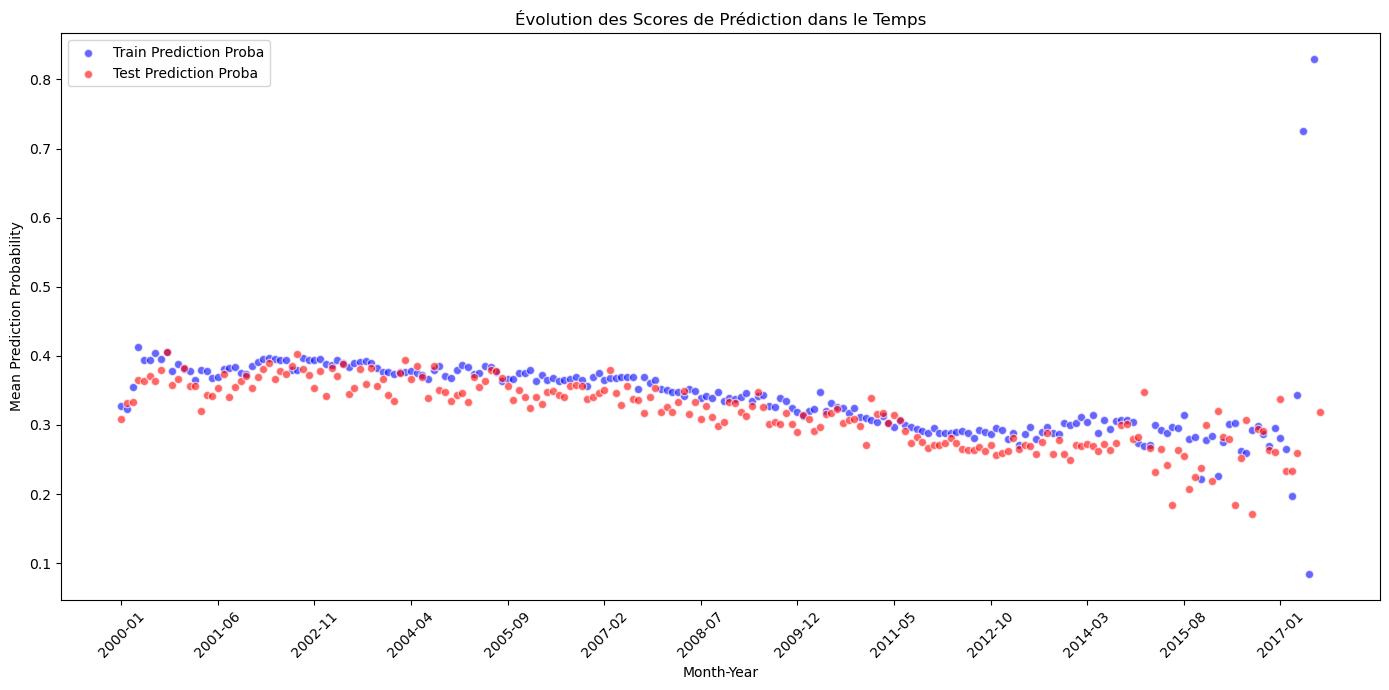

In [32]:
plt.figure(figsize=(14, 7))
plt.scatter(train_monthly.index.astype(str), train_monthly['prediction_proba'], label='Train Prediction Proba', color='blue', alpha=0.6, edgecolors='w')
plt.scatter(test_monthly.index.astype(str), test_monthly['prediction_proba'], label='Test Prediction Proba', color='red', alpha=0.6, edgecolors='w')

plt.xlabel('Month-Year')
plt.ylabel('Mean Prediction Probability')
plt.title('Évolution des Scores de Prédiction dans le Temps')
plt.legend()
plt.xticks(ticks=range(0, len(train_monthly.index), max(1, len(train_monthly.index) // 12)),
           labels=train_monthly.index.astype(str)[::max(1, len(train_monthly.index) // 12)], rotation=45)
plt.tight_layout()
plt.show()

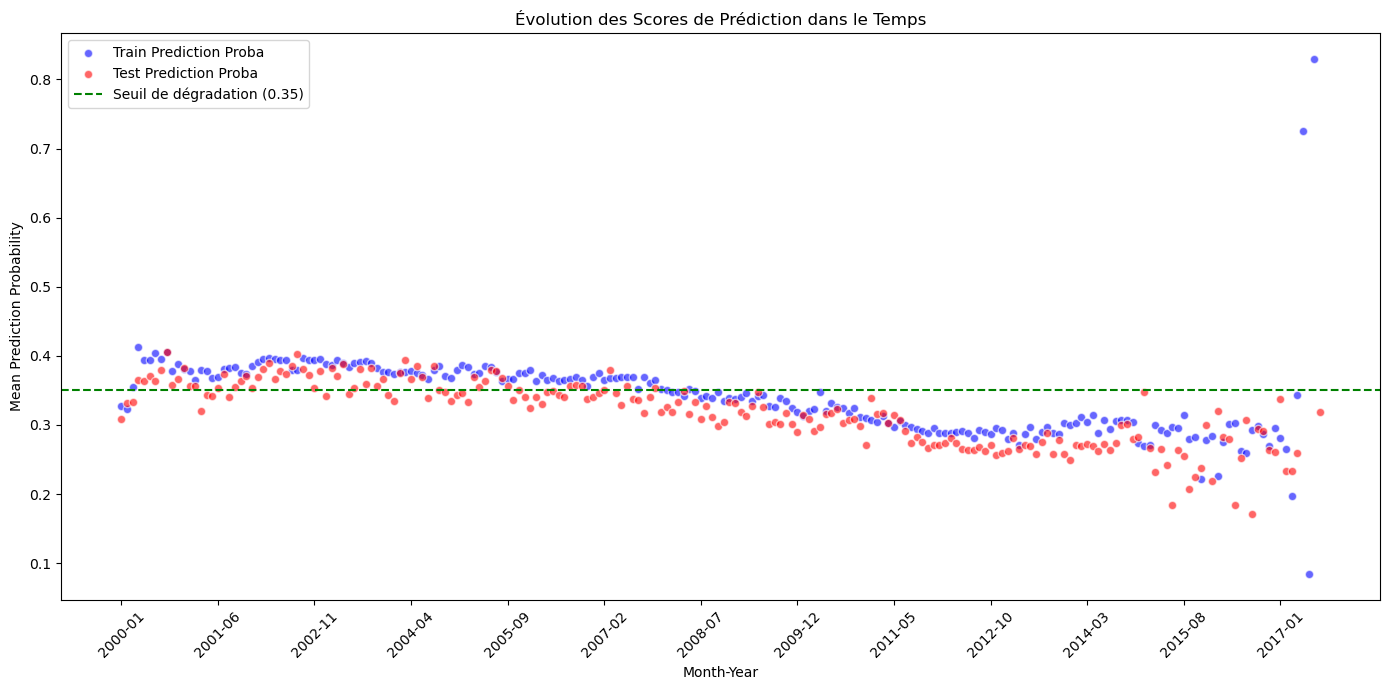

In [34]:
threshold = 0.35  # Exemple de seuil de dégradation
plt.figure(figsize=(14, 7))
plt.scatter(train_monthly.index.astype(str), train_monthly['prediction_proba'], label='Train Prediction Proba', color='blue', alpha=0.6, edgecolors='w')
plt.scatter(test_monthly.index.astype(str), test_monthly['prediction_proba'], label='Test Prediction Proba', color='red', alpha=0.6, edgecolors='w')

# Ajout d'une droite indiquant le seuil pour réentraînement
plt.axhline(y=threshold, color='green', linestyle='--', label=f'Seuil de dégradation ({threshold})')

plt.xlabel('Month-Year')
plt.ylabel('Mean Prediction Probability')
plt.title('Évolution des Scores de Prédiction dans le Temps')
plt.legend()
plt.xticks(ticks=range(0, len(train_monthly.index), max(1, len(train_monthly.index) // 12)),
           labels=train_monthly.index.astype(str)[::max(1, len(train_monthly.index) // 12)], rotation=45)
plt.tight_layout()
plt.show()

In [43]:
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset

# Préparer les données pour l'analyse de drift temporel
train_scores_temp = train_scores[['Month_Year', 'prediction_proba']]
test_scores_temp = test_scores[['Month_Year', 'prediction_proba']]

# Créer et exécuter le rapport de drift temporel
drift_report = Report(metrics=[DataDriftPreset()])
drift_report.run(reference_data=train_scores_temp, current_data=test_scores_temp)

# Sauvegarder le rapport
drift_report.save_html('data_drift_report_temporal.html')

In [35]:
# Afficher les valeurs des probabilités
print(train_scores['prediction_proba'].describe())

# Compter combien de probabilités sont au-dessus de 0.5
above_threshold = (train_scores['prediction_proba'] > 0.5).sum()
total_predictions = len(train_scores)

print(f"Nombre de probabilités au-dessus de 0.5 : {above_threshold}")
print(f"Total des prédictions : {total_predictions}")


count    307492.000000
mean          0.338213
std           0.220047
min           0.000482
25%           0.156503
50%           0.297232
75%           0.490655
max           0.990783
Name: prediction_proba, dtype: float64
Nombre de probabilités au-dessus de 0.5 : 73867
Total des prédictions : 307492


In [36]:
# Afficher les valeurs des probabilités
print(test_scores['prediction_proba'].describe())

# Compter combien de probabilités sont au-dessus de 0.5
above_threshold = (test_scores['prediction_proba'] > 0.5).sum()
total_predictions = len(test_scores)

print(f"Nombre de probabilités au-dessus de 0.5 : {above_threshold}")
print(f"Total des prédictions : {total_predictions}")

count    48743.000000
mean         0.317879
std          0.215743
min          0.001364
25%          0.138377
50%          0.274099
75%          0.464781
max          0.970821
Name: prediction_proba, dtype: float64
Nombre de probabilités au-dessus de 0.5 : 10493
Total des prédictions : 48743
